# 1-	Overview
Analyzing smart device fitness data to find new trends in data and using these trends to guide the company’s marketing strategy.

# 2-	Preparing the data:
Fitbit Fitness Tracker Data (Public Domain, dataset made available through Mobius). https://www.kaggle.com/datasets/arashnic/fitbit
This dataset is generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016 and contains a personal fitness tracker from thirty Fitbit users.
•	Reliable: Unknown
•	Original: Yes
•	Comprehensive: No, it is incomplete and might be biased as it is tracked from only 30 Fitbit users.
•	Current: No, it is historical data collected between 03.12.2016 and 05.12.2016
•	Cited: Yes
Data Organization:
Chose 3 datasets for data analysis: dailyActivity, sleepy, and weightLogInfo which are structured data in .csv format that consists of minute-level output for physical activity, sleep monitoring, daily activity, steps, and weight specifics.

# 3-	Process the data:
1-	Import the needed packages and data
2-	Preview the data
3-	Check data types
4-	Apply changes and verify the conversion of the new data types
5-	Check for duplicates in the 3 data sets
6-	Remove duplicates
7-	Verify the removal of duplicates
8-	Check for nulls and missing values
9-	Remove the nulls from datasets
10-	Fix formatting and naming
11-	Verify the name changes

# 4-	Analyze the data:
1-	Import the needed packages and data
2-	Preview the data
3-	Check for the count of rows
4-	It is recommended by CDC that a person should walk at least 100000 steps a day on average. Therefore, checking for the people having steps equal to or above the daily average recommended limit.
5-	It is recommended that an average person requires more than 7 hours of sleep. Therefore, checking for the sleep duration.
6-	Categorizing based on BMI

# 5-	Share:
1-	Correlation between steps and distance
2-	Correlation between steps and calories burnt
3-	Observing sleep patterns
4-	Identifying different BMI categories


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import datasets
dailyactivity_df = pd.read_csv("dailyActivity_merged.csv")
sleepactivity_df = pd.read_csv("sleepDay_merged.csv")
weightactivity_df = pd.read_csv("weightLogInfo_merged.csv")

In [10]:
#drop missing values
dailyactivity_df.dropna
weightactivity_df.dropna
sleepactivity_df.dropna

<bound method DataFrame.dropna of              Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2016 12:00:00 AM                  1                 327   
1    1503960366  4/13/2016 12:00:00 AM                  2                 384   
2    1503960366  4/15/2016 12:00:00 AM                  1                 412   
3    1503960366  4/16/2016 12:00:00 AM                  2                 340   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2016 12:00:00 AM                  1                 343   
409  8792009665   5/1/2016 12:00:00 AM                  1                 503   
410  8792009665   5/2/2016 12:00:00 AM                  1                 415   
411  8792009665   5/3/2016 12:00:00 AM                  1                 516   
412  8792009665   5/4/2016 12:00:00 AM                  1                 4

In [4]:
#Now let's clean the daily activity dataframe
# preview first 10 rows with all columns
dailyactivity_df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [8]:
# check the number of missing datapoints
missing_values_count = dailyactivity_df.isnull().sum()
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [9]:
# show information of data
dailyactivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [12]:
#change string date objects to a date data type object
dailyactivity_df['ActivityDate'] = pd.to_datetime(dailyactivity_df['ActivityDate'])
weightactivity_df['Date'] = pd.to_datetime(weightactivity_df['Date'])
sleepactivity_df['SleepDay'] = pd.to_datetime(sleepactivity_df['SleepDay'])
print(dailyactivity_df.dtypes)
print(sleepactivity_df.dtypes)
print(weightactivity_df.dtypes)

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object
Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object
Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat       

In [15]:
#Renaming the date columns to maintain consistency
dailyactivity_df.rename(columns={'date':'ActivityDate'},inplace=True)
weightactivity_df.rename(columns={'date':'Date'},inplace=True)
sleepactivity_df.rename(columns={'date':'SleepDay'},inplace=True)
print(dailyactivity_df.dtypes,weightactivity_df.dtypes,sleepactivity_df.dtypes)


Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object Id                             int64
SleepDay              date

In [22]:
# create new column "total_mins" containing sum of total minutes.
dailyactivity_df["total_mins"] = dailyactivity_df["VeryActiveMinutes"] + dailyactivity_df["FairlyActiveMinutes"] + dailyactivity_df["LightlyActiveMinutes"] + dailyactivity_df["SedentaryMinutes"]
dailyactivity_df["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [23]:
#It is recommended by CDC that a person should walk at least 10000 steps a day on average.
#Therefore, checking for the people having steps equal to or above the daily average recommended limit.
y = dailyactivity_df['TotalSteps'] >= 10000
print(y.sum())

303


After filtering the data only 303 out of 940 samples are above 10000 steps

In [24]:
#It is recommended that an average person requires more than 7 hours of sleep.
#Therefore, checking for the sleep duration.
x = sleepactivity_df['TotalMinutesAsleep'] >= (7*60)
print(x.sum())

231


After filtering the day we find that only 231 users sleep 7 hours or more per day

In [26]:
#Categorizing based on BMI and printing columns to verify the categorizing
def filter(x):
    if (x > 18.5 and x < 24.99) : return 'Normal Weight'
    if (x > 25 and x < 29.9) : return 'Over Weight'
    if (x > 30) : return 'Obesity'

weightactivity_df['Category'] = weightactivity_df['BMI'].apply(filter)

print(weightactivity_df[['Id','WeightKg','BMI']].head())


           Id    WeightKg        BMI
0  1503960366   52.599998  22.650000
1  1503960366   52.599998  22.650000
2  1927972279  133.500000  47.540001
3  2873212765   56.700001  21.450001
4  2873212765   57.299999  21.690001


               TotalSteps  TotalDistance
TotalSteps       1.000000       0.985369
TotalDistance    0.985369       1.000000


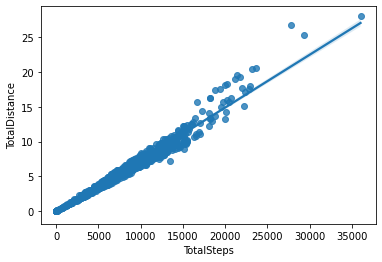

In [29]:
# Visualize Correlation between steps and distance
X = dailyactivity_df[['TotalSteps','TotalDistance']].corr()
print(X)
sns.regplot(x='TotalSteps',y='TotalDistance',data=dailyactivity_df)
plt.show()

            TotalSteps  Calories
TotalSteps    1.000000  0.591568
Calories      0.591568  1.000000


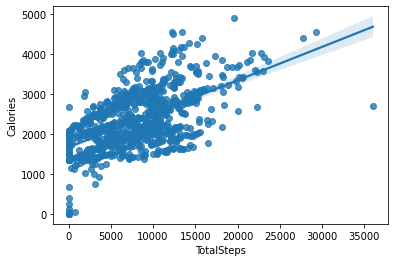

In [31]:
#Correlation between steps and calories
X = dailyactivity_df[['TotalSteps','Calories']].corr()
print(X)
sns.regplot(x='TotalSteps',y='Calories',data=dailyactivity_df)
plt.show()

                    TotalMinutesAsleep  TotalSleepRecords
TotalMinutesAsleep            1.000000           0.165912
TotalSleepRecords             0.165912           1.000000


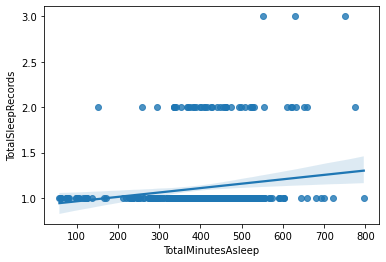

In [32]:
#Observing sleep patterns
X = sleepactivity_df[['TotalMinutesAsleep','TotalSleepRecords']].corr()
print(X)
sns.regplot(x='TotalMinutesAsleep',y='TotalSleepRecords',data=sleepactivity_df)
plt.show()

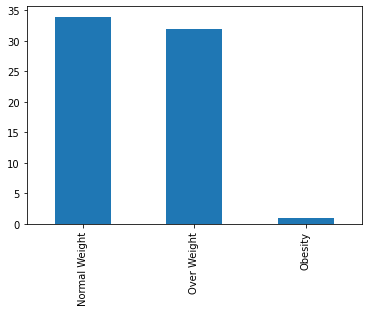

In [34]:
#Identifying different BMI categories
weightactivity_df['Category'].value_counts().plot(kind='bar')
plt.show()

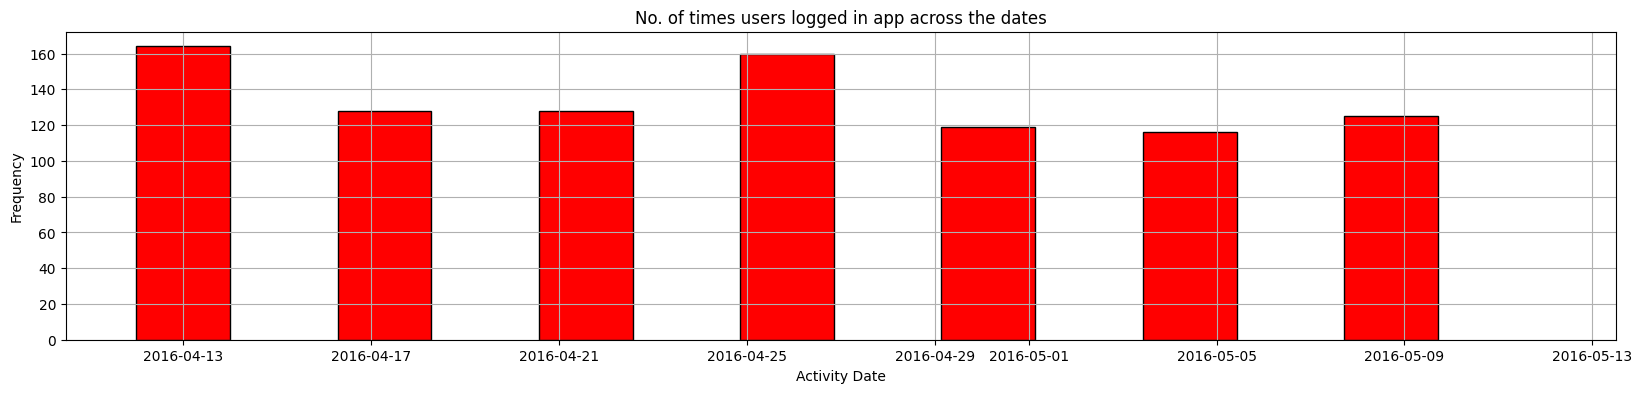

In [49]:
# Noew lets see the number of users who logged in the app accross the dates
plt.style.use("default")
plt.figure(figsize=(20,4)) # specify size of the chart
plt.hist(dailyactivity_df.ActivityDate, bins = 7, 
         width = 2, color = "red", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Activity Date")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the dates")
plt.grid(True)
plt.show()

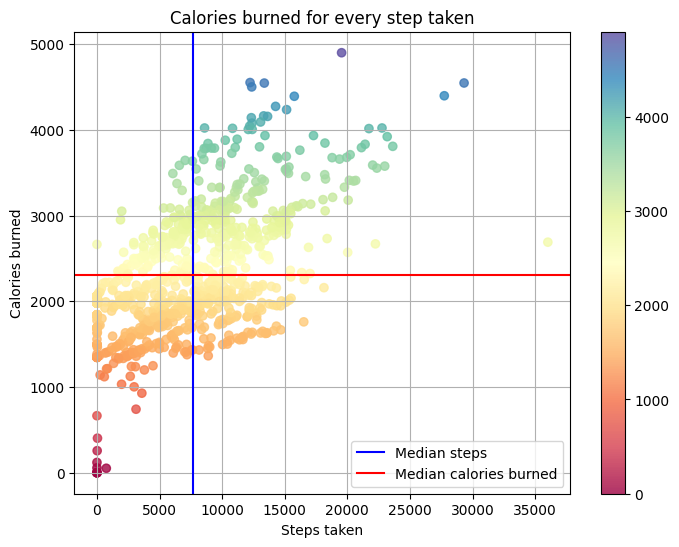

In [48]:
plt.style.use("default")
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(dailyactivity_df.TotalSteps, dailyactivity_df.Calories, 
            alpha = 0.8, c = dailyactivity_df.Calories, 
            cmap = "Spectral")

# add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

We discovered that the intensity of calories burned increases when users are between 0 and 15,000 steps, with the rate of calories burned decreasing after 15,000 steps.

There were a few outliers:

There are no steps taken and no to few calories expended.
1 observation of more than 35,000 steps with a total of 3,000 calories burnt.
Outliers were determined to be the result of natural variance in data, changes in user usage, or errors in data collecting 

Bellabeat can add calorie tracking in their products for the customers

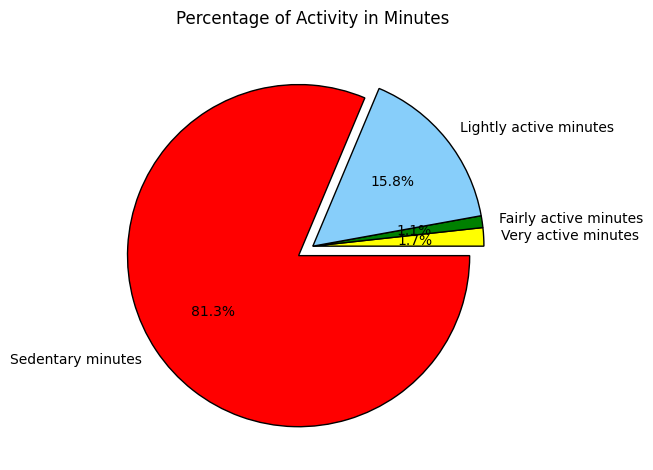

In [56]:
very_active_mins = dailyactivity_df["VeryActiveMinutes"].sum()
fairly_active_mins = dailyactivity_df["FairlyActiveMinutes"].sum()
lightly_active_mins = dailyactivity_df["LightlyActiveMinutes"].sum()
sedentary_mins = dailyactivity_df["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["yellow", "green", "lightskyblue", "Red"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

Sedentary minutes account for 81.3% of the total.

This means that users are logging daily activities such as daily commutes, inactive movements (moving from one location to another), or doing errands using the FitBit app.

According to the minor percentages of fairly active activity (1.1%) and extremely active activity (1.7%), the app is rarely used to track fitness (i.e. running). This is quite discouraging because the FitBit app was designed to promote fitness.

•	Due to a limited number of observations from the datasets, concrete insights cannot be derived to imply strategies for the products. More data is needed.

•	Also, the datasets do not seem to be comprehensive as they do not mention other factors like age, gender, or location to derive more insights.

•	Because the count of unique IDs from the above datasets is unequal, it is difficult to join and identify any correlation between the multiple datasets chosen.

#Conclusion

- The FitBit app is used by the majority of users (81.3%) to track sedentary behaviours rather than health practises.

- Users prefer to track their activities during the week as opposed to the weekends, possibly because they spend more time outside during the week and stay indoors on weekends.

- The Bellabeat marketing team can encourage customers by educating and arming them with knowledge about fitness advantages, recommending different types of activity, and providing calorie intake and burn rate information on the Bellabeat app.